In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the global-cities.dat file. Format sample: AAA|1|Anaa
cities = pd.read_csv('global-cities.dat', sep='|', header=None, names=['code', 'node_id', 'city'], engine='python')
cities['node_id'] = cities['node_id'].astype(int)

# Read the global-net.dat file. Format sample: 1 1198
edges = pd.read_csv('global-net.dat', sep='\s+', header=None, names=['source', 'target'], engine='python')
edges['source'] = edges['source'].astype(int)
edges['target'] = edges['target'].astype(int)

In [3]:
# Create an undirected graph
G = nx.Graph()

# Add nodes with city name as an attribute
for _, row in cities.iterrows():
    node_id = row['node_id']
    city_name = row['city']
    G.add_node(node_id, name=city_name)

# Add edges to the graph
for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])

Problem 2.1: Basic graph attributes: how many nodes and (undirected) edges are in this network?

In [4]:
# Number of nodes and edges
print("Total number of nodes:", G.number_of_nodes())
print("Total number of undirected edges:", G.number_of_edges())

Total number of nodes: 3883
Total number of undirected edges: 14142


Problem 2.2: How many connected components are in this graph, how many nodes and edges do the largest component contain?

In [6]:
# Connected components
components = list(nx.connected_components(G))
print("Number of connected components:", len(components))

# Extract the largest connected component
largest_component = max(components, key=len)
G_largest = G.subgraph(largest_component).copy()
print("Number of nodes in the largest component:", G_largest.number_of_nodes())
print("Number of edges in the largest component:", G_largest.number_of_edges())

Number of connected components: 266
Number of nodes in the largest component: 3618
Number of edges in the largest component: 14142


Problem 2.3: Denote the largest component as G. List the top 10 nodes in G having the highest degree, and how many other nodes are they connected to. Please give names of the city/airport, node ids will not be accepted.

In [7]:
# Get the degree for each node in the largest component
degree_list = G_largest.degree()
# Sort the nodes in descending order by degree
sorted_degrees = sorted(degree_list, key=lambda x: x[1], reverse=True)

print("Top 10 nodes in the G having the highest degree:")
for i, (node, degree) in enumerate(sorted_degrees[:10]):
    city_name = G_largest.nodes[node].get('name', 'Unknown')
    print(f"{i+1}. {city_name} - degree: {degree}")

Top 10 nodes in the G having the highest degree:
1. Paris - degree: 250
2. London (GB) - degree: 242
3. Frankfurt - degree: 237
4. Amsterdam - degree: 192
5. Moscow - degree: 186
6. Chicago - degree: 184
7. New York - degree: 179
8. Atlanta - degree: 172
9. Dallas/Fort Worth - degree: 147
10. Houston - degree: 144


Problem 2.4: Plot the degree distribution of the network G. Each data point is a pair (x,y) where x is a positive integer and y is the fraction of nodes in the network with degree equal to x. Also plot the degree distribution on a log-log scale. Restrict the range of x between the minimum and maximum degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes. Include numeric labels on each axes for the reader to make sense of the plot.

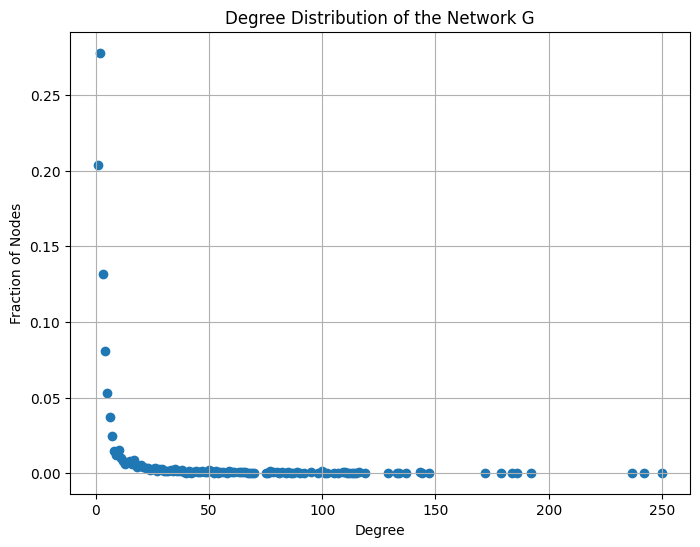

In [31]:
# Create the degree sequence and compute the frequency for each unique degree
degree_sequence = [d for _, d in G_largest.degree()]
degree_values = sorted(set(degree_sequence))
frequency = [degree_sequence.count(x) for x in degree_values]
total_nodes = G_largest.number_of_nodes()
fraction = [f / total_nodes for f in frequency]

# Plot the degree distribution on a regular scale
plt.figure(figsize=(8, 6))
plt.scatter(degree_values, fraction)
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.title("Degree Distribution of the Network G")
plt.grid(True)
plt.show()

Plot the degree distribution on a log-log scale:

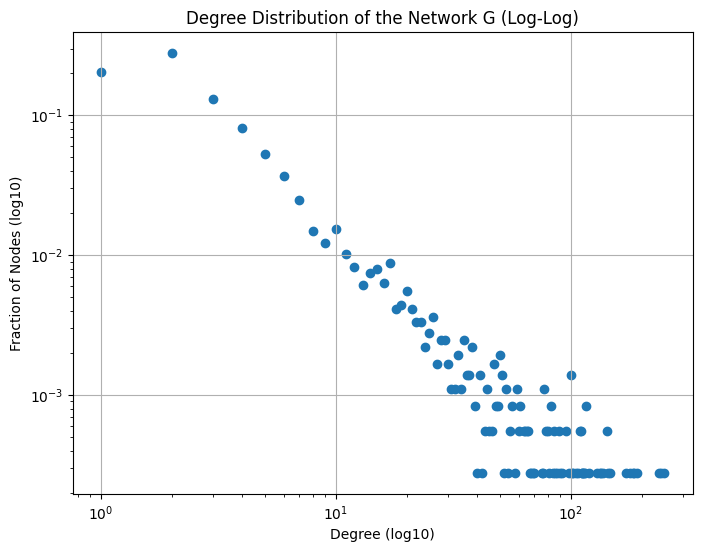

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(degree_values, fraction)
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.xlabel("Degree (log10)")
plt.ylabel("Fraction of Nodes (log10)")
plt.title("Degree Distribution of the Network G (Log-Log)")
plt.grid(True)
plt.show()

Problem 2.5: What is the (unweighted) diameter of the giant component G in this network? List a longest (unweighted) shortest path between two cities. Please give names of the city/airport, node ids will not be accepted.

In [34]:
# Unweighted diameter of the giant component
try:
    diameter = nx.diameter(G_largest)
    print("Diameter of the giant component G:", diameter)
except Exception as e:
    print("Error computing diameter:", e)

# Find the diameter path
def find_diameter_path(G):
    max_length = 0
    diameter_path = []
    for source in G.nodes():
        lengths = nx.single_source_shortest_path_length(G, source)
        for target, length in lengths.items():
            if length > max_length:
                max_length = length
                diameter_path = nx.shortest_path(G, source=source, target=target)
    return diameter_path

diameter_path = find_diameter_path(G_largest)
print("A longest unweighted shortest path between two cities:")
for node in diameter_path:
    print(G_largest.nodes[node].get('name', 'Unknown'))

Diameter of the giant component G: 17
A longest unweighted shortest path between two cities:
Brize Norton
Georgetown (XV)
Mount Pleasant
Punta Arenas
Concepcion (CL)
Santiago (CL)
Buenos Aires
Auckland
Brisbane
Port Moresby
Lae
Indagen
Konge
Kabwum
Satwag
Derim
Yalumet
Wasu


Problem 2.6: What is the smallest number of flights you need to take to get from Canberra (CBR)
to Cape Town (CPT)? Which airports does your route take you through? Please give
names of the city/airport, node ids will not be accepted.

In [12]:
# Get node by city name
def get_node_by_city(G, city_name):
    for node, data in G.nodes(data=True):
        if data.get('name', '').lower() == city_name.lower():
            return node
    return None

# Retrieve node ids for Canberra and Cape Town
node_canberra = get_node_by_city(G_largest, "Canberra")
node_capetown = get_node_by_city(G_largest, "Cape Town")

if node_canberra is None or node_capetown is None:
    print("Cannot find 'Canberra' or 'Cape Town'.")
else:
    shortest_path = nx.shortest_path(G_largest, source=node_canberra, target=node_capetown)
    print("Shortest path from Canberra to Cape Town:")
    for node in shortest_path:
        print(G_largest.nodes[node].get('name', 'Unknown'))
    print("Smallest number of flights:", len(shortest_path) - 1)


Shortest path from Canberra to Cape Town:
Canberra
Melbourne (AU)
Mauritius
Cape Town
Smallest number of flights: 3


Problem 2.7: Which airport/city in G is most “central” by having the largest betweenness, list the
top 10 cities with their betweenness value?

In [35]:
# Compute betweenness centrality for all nodes in the giant component
betweenness = nx.betweenness_centrality(G_largest)

# Sort nodes by betweenness centrality in descending order and list the top 10
top10 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 cities by betweenness centrality:")
for node, bc in top10:
    print(f"{G_largest.nodes[node].get('name', 'Unknown')} - betweenness value: {bc:.6f}")


Top 10 cities by betweenness centrality:
Paris - betweenness value: 0.093420
London (GB) - betweenness value: 0.084989
Anchorage - betweenness value: 0.081523
Singapore - betweenness value: 0.075362
New York - betweenness value: 0.069283
Los Angeles (US) - betweenness value: 0.066250
Frankfurt - betweenness value: 0.065578
Port Moresby - betweenness value: 0.064323
Tokyo - betweenness value: 0.060243
Seattle - betweenness value: 0.052379
